## Plotting Notebook

#### Dowloading dataframes

In [28]:
import pandas as pd

In [76]:
dfr01 = pd.read_json("/Users/cameronkaminski/glomerulus-lab/slow_feature_learning/src/records/r01.json")
dfs01 = pd.read_json("/Users/cameronkaminski/glomerulus-lab/slow_feature_learning/src/records/s01.json")
dfr27 = pd.read_json("/Users/cameronkaminski/glomerulus-lab/slow_feature_learning/src/records/r27.json")
dfs27 = pd.read_json("/Users/cameronkaminski/glomerulus-lab/slow_feature_learning/src/records/s27.json")
dfr89 = pd.read_json("/Users/cameronkaminski/glomerulus-lab/slow_feature_learning/src/records/r89.json")
dfs89 = pd.read_json("/Users/cameronkaminski/glomerulus-lab/slow_feature_learning/src/records/s89.json")
dfr01["MNIST"] = "01"
dfr27["MNIST"] = "27"
dfr89["MNIST"] = "89"
dfr01 = dfr01.rename(columns={"Centered Kernel Alignment" : "CKA reg.", "Training Accuracy" : "Train reg.","Validation Accuracy": "Val reg."})
dfr27 = dfr27.rename(columns={"Centered Kernel Alignment" : "CKA reg.", "Training Accuracy" : "Train reg.","Validation Accuracy": "Val reg."})
dfr89 = dfr89.rename(columns={"Centered Kernel Alignment" : "CKA reg.", "Training Accuracy" : "Train reg.","Validation Accuracy": "Val reg."})

dfs01 = dfs01.rename(columns={"Centered Kernel Alignment" : "CKA slo.", "Training Accuracy" : "Train slo.","Validation Accuracy": "Val slo."})
dfs27 = dfs27.rename(columns={"Centered Kernel Alignment" : "CKA slo.", "Training Accuracy" : "Train slo.","Validation Accuracy": "Val slo."})
dfs89 = dfs89.rename(columns={"Centered Kernel Alignment" : "CKA slo.", "Training Accuracy" : "Train slo.","Validation Accuracy": "Val slo."})

In [84]:
df = pd.concat([dfr01,dfr27,dfr89])
df1 = pd.concat([dfs01,dfs27,dfs89])
df["Epoch"] = df.index + 1
df2 = pd.concat([df, df1], axis=1)

In [85]:
df2

,CKA reg.,Train reg.,Val reg.,MNIST,Epoch,CKA slo.,Train slo.,Val slo.
0,0.798630,0.996131,0.998109,01,1,0.781623,0.994789,0.998109
1,0.808230,0.997394,0.998582,01,2,0.783445,0.996447,0.998582
2,0.810234,0.997631,0.998582,01,3,0.784792,0.996921,0.998582
3,0.811090,0.998105,0.999054,01,4,0.783674,0.997473,0.998582
4,0.811354,0.998105,0.999054,01,5,0.783528,0.997631,0.999054
...,...,...,...,...,...,...,...,...
2995,0.546103,1.000000,0.996470,89,2996,0.447912,1.000000,0.995461
2996,0.547604,1.000000,0.996470,89,2997,0.449850,1.000000,0.995461
2997,0.547059,1.000000,0.996470,89,2998,0.448071,1.000000,0.995461
2998,0.546997,1.000000,0.996470,89,2999,0.447620,1.000000,0.995461


#### Graphs

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

##### CKA

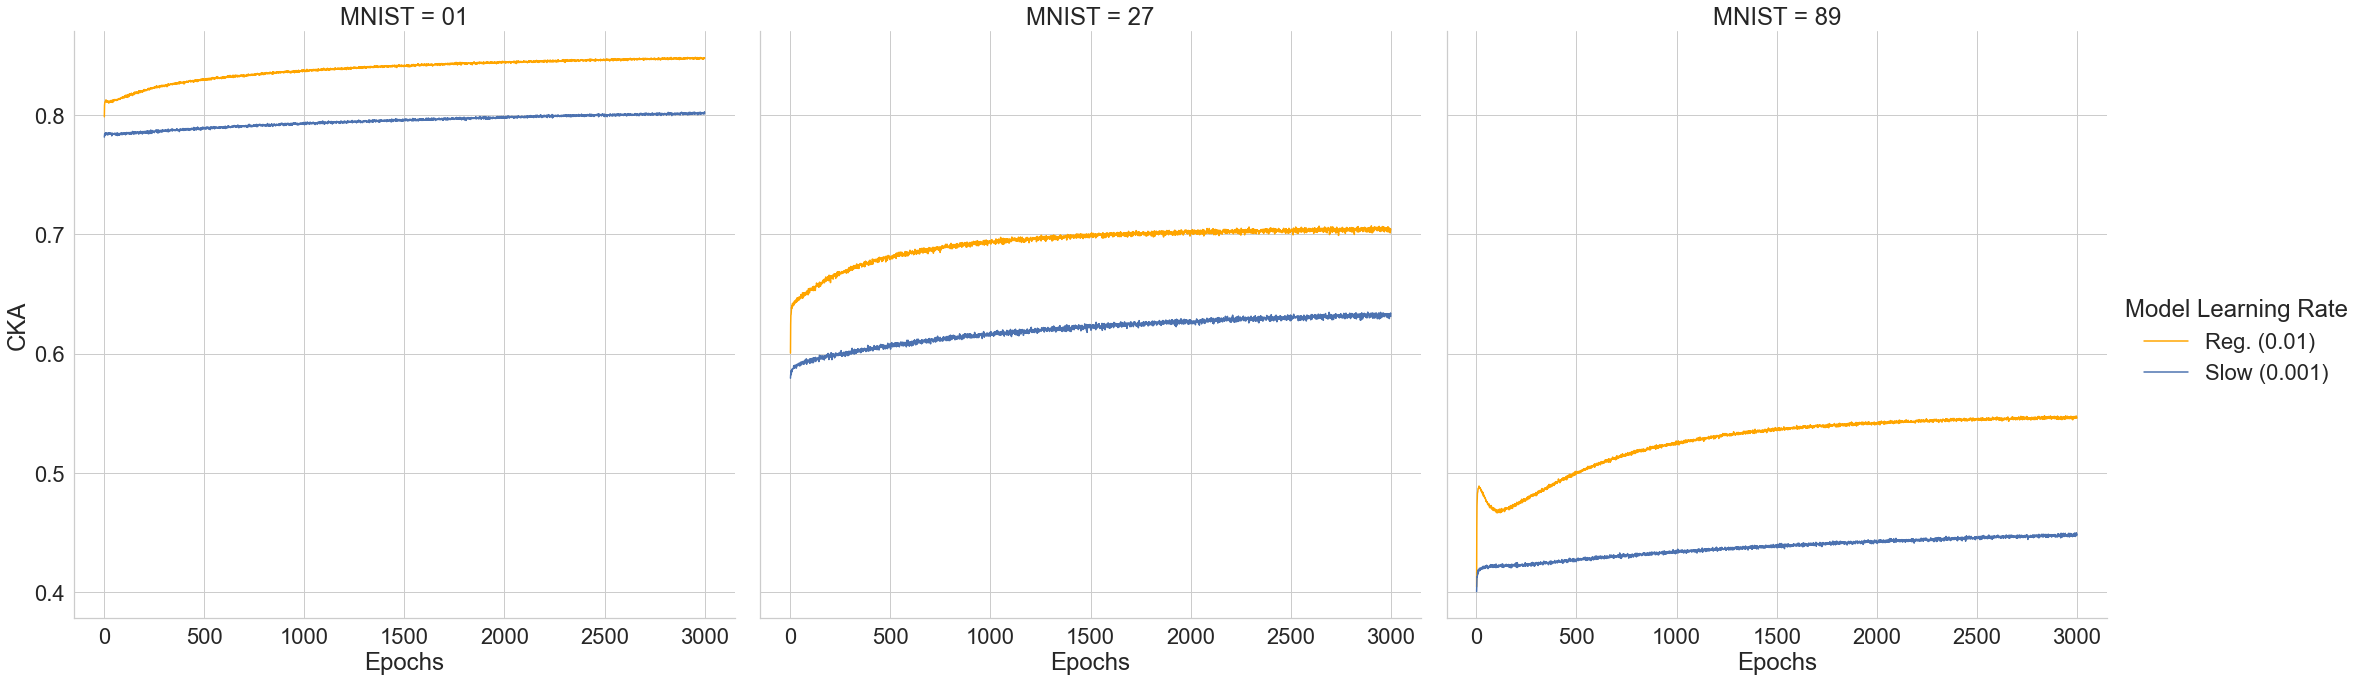

In [132]:
sns.set(font_scale = 2.0)
sns.set_style('whitegrid')
g = sns.FacetGrid(df2, col="MNIST", col_wrap=3, height = 10)
g.map(sns.lineplot, "Epoch", "CKA reg.", color ='orange', label="Reg. (0.01)")
g.map(sns.lineplot, "Epoch", "CKA slo.", label = "Slow (0.001)")
g.set_axis_labels("Epochs", "CKA")
g.add_legend(title="Model Learning Rate")

##### Train + CKA

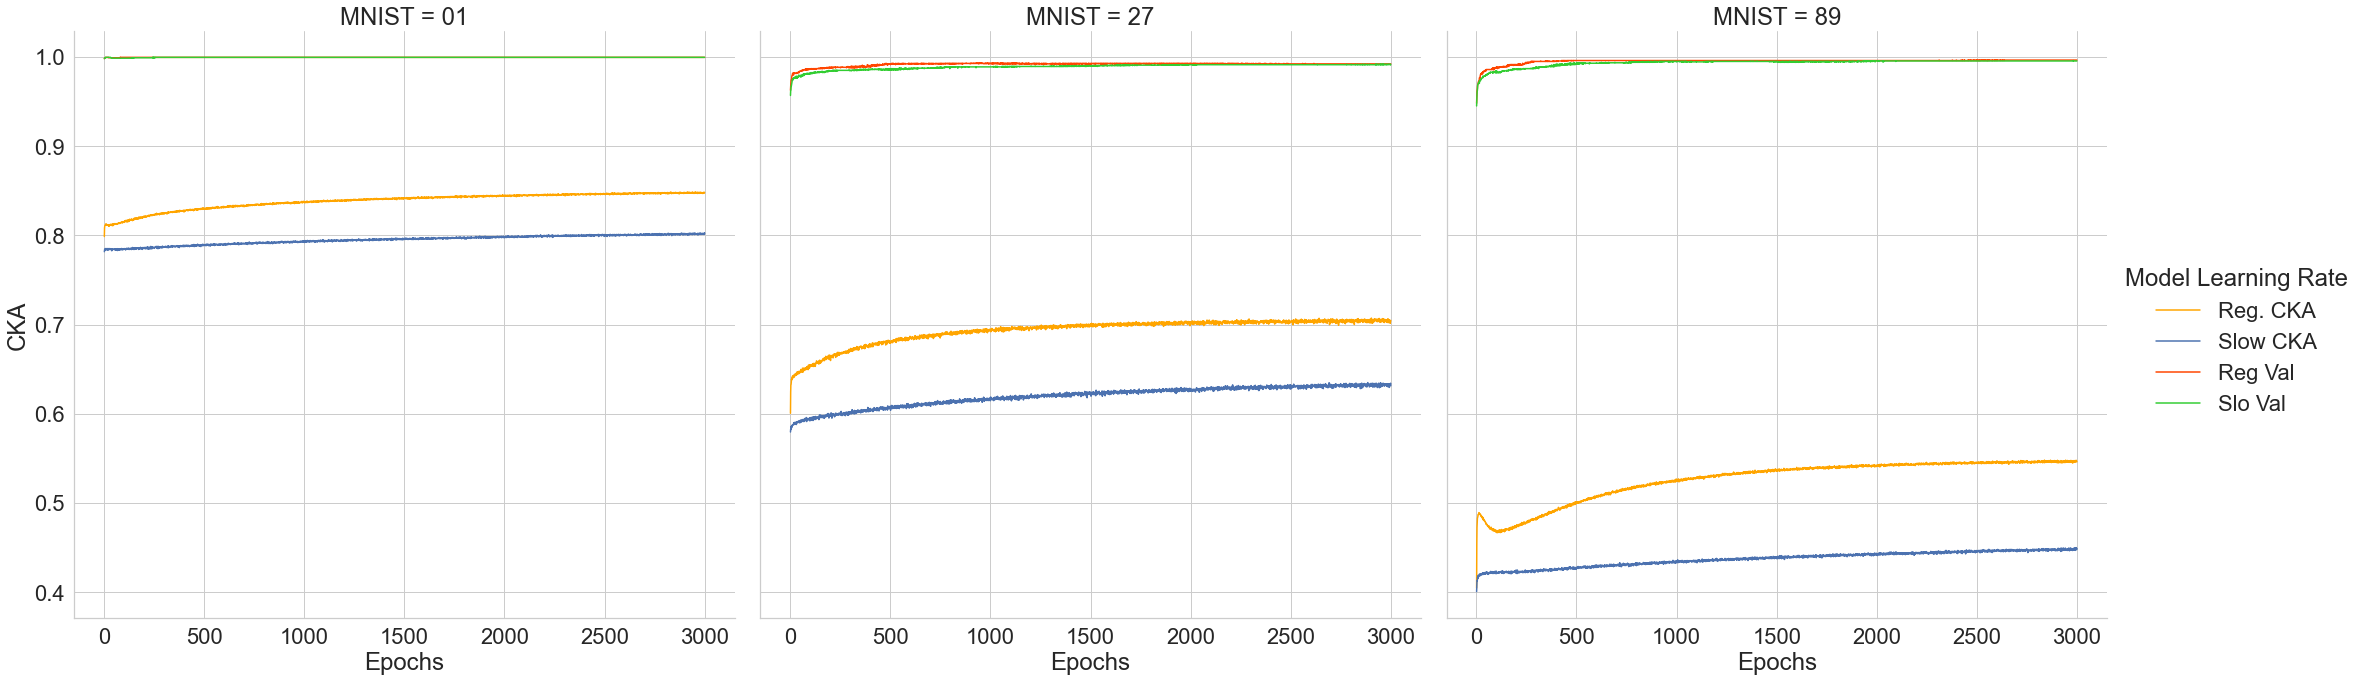

In [150]:
sns.set(font_scale = 2.0)
sns.set_style('whitegrid')
g = sns.FacetGrid(df2, col="MNIST", col_wrap=3, height = 10)
g.map(sns.lineplot, "Epoch", "CKA reg.", color ='orange', label="Reg. CKA")
g.map(sns.lineplot, "Epoch", "CKA slo.", label = "Slow CKA")
g.map(sns.lineplot, "Epoch", "Val reg.", color = "orangered", label="Reg Val")
g.map(sns.lineplot, "Epoch", "Val slo.", color = "limegreen", label="Slo Val")
g.set_axis_labels("Epochs", "CKA")
g.add_legend(title="Model Learning Rate")

##### Train & Val Accuracy

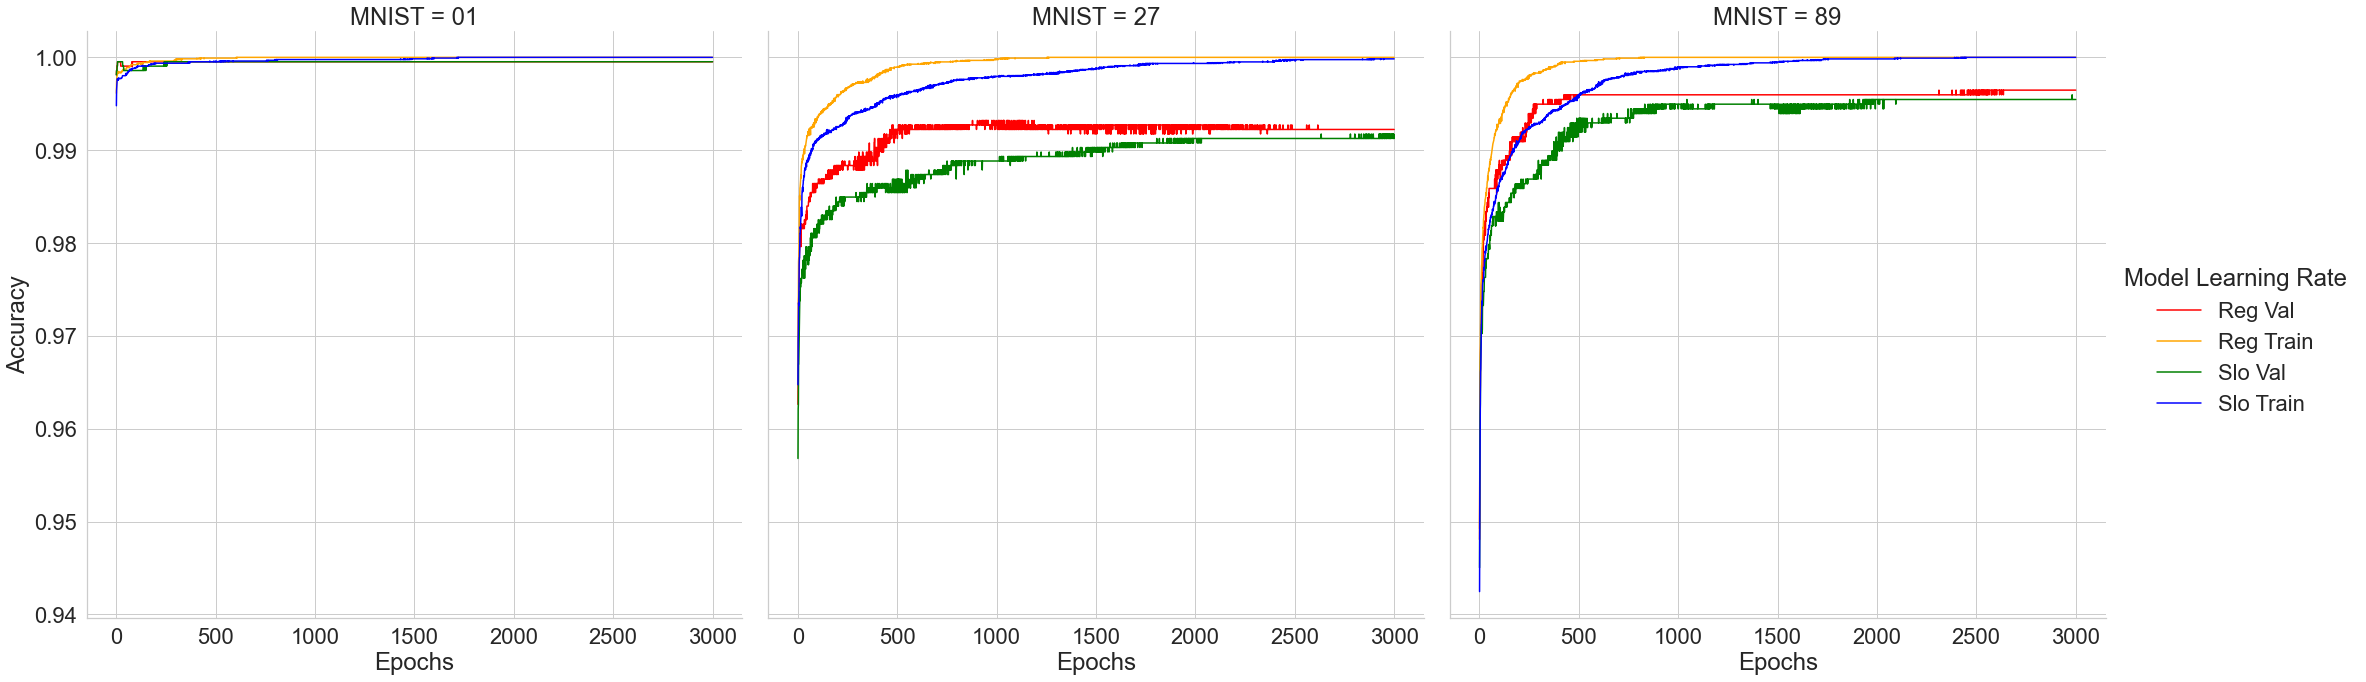

In [155]:
sns.set(font_scale = 2.0)
sns.set_style('whitegrid')
g = sns.FacetGrid(df2, col="MNIST", col_wrap=3, height = 10)
g.map(sns.lineplot, "Epoch", "Val reg.", color = "red", label="Reg Val")
g.map(sns.lineplot, "Epoch", "Train reg.", color = "orange", label="Reg Train")
g.map(sns.lineplot, "Epoch", "Val slo.", color = "green", label="Slo Val")
g.map(sns.lineplot, "Epoch", "Train slo.", color = "blue", label="Slo Train")
g.set_axis_labels("Epochs", "Accuracy")
g.add_legend(title="Model Learning Rate")